In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from opf_python.sc import sc_3
from opf_python.hx import hex_12
from opf_python.stet import stet_11
from opf_python.rhom import rhom_4_2
from opf_python.so import so_32
from opf_python.sm import sm_33

In [2]:
def primes(n):
    primfac = {}
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            if d not in primfac.keys():
                primfac[d] =1  # supposing you want multiple factors repeated
            else: 
                primfac[d] += 1
            n //= d
        d += 1
    if n > 1:
       primfac[n] = 1
    return primfac

In [3]:
def n_HNFs(n):
    total = 1
    ps = primes(n)
    for k in ps:
        temp = (k**(ps[k]+2)-1)*(k**(ps[k]+1)-1)/((k+1)*(k-1)**2)
        total *= temp
    
    return total       

In [8]:
all_HNFs = []
cubic_HNFs = []
hex_HNFs = []
rhom_HNFs = []
tet_HNFs = []
orth_HNFs = []
mono_HNFs = []
xs = []
for i in range(10000):
    if i%1000==0:
        print("i",i)
    if i < 10:
        all_HNFs.append(n_HNFs(i))
        cubic_HNFs.append(len(sc_3(i)))
        hex_HNFs.append(len(hex_12(i)))
        rhom_HNFs.append(len(rhom_4_2(i)))
        tet_HNFs.append(len(stet_11(i)))
        orth_HNFs.append(len(so_32(i)))
        mono_HNFs.append(len(sm_33(i)))
        xs.append(i)
    elif i < 100 and i%10==0:
        all_HNFs.append(n_HNFs(i))
        cubic_HNFs.append(len(sc_3(i)))
        hex_HNFs.append(len(hex_12(i)))
        rhom_HNFs.append(len(rhom_4_2(i)))
        tet_HNFs.append(len(stet_11(i)))
        orth_HNFs.append(len(so_32(i)))
        mono_HNFs.append(len(sm_33(i)))
        xs.append(i)
    elif i>=100 and i<1000 and i%100==0:
        all_HNFs.append(n_HNFs(i))
        cubic_HNFs.append(len(sc_3(i)))
        hex_HNFs.append(len(hex_12(i)))
        rhom_HNFs.append(len(rhom_4_2(i)))
        tet_HNFs.append(len(stet_11(i)))
        orth_HNFs.append(len(so_32(i)))
        mono_HNFs.append(len(sm_33(i)))
        xs.append(i)
    elif i>=1000 and i<=10000 and i%1000==0:
        all_HNFs.append(n_HNFs(i))
        cubic_HNFs.append(len(sc_3(i)))
        hex_HNFs.append(len(hex_12(i)))
        rhom_HNFs.append(len(rhom_4_2(i)))
        tet_HNFs.append(len(stet_11(i)))
        orth_HNFs.append(len(so_32(i)))
        mono_HNFs.append(len(sm_33(i))) 
        xs.append(i)

('i', 0)
('i', 1000)
('i', 2000)
('i', 3000)
('i', 4000)
('i', 5000)
('i', 6000)
('i', 7000)
('i', 8000)
('i', 9000)


/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Users/wileymorgan/.virtualenvs/kpoints/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


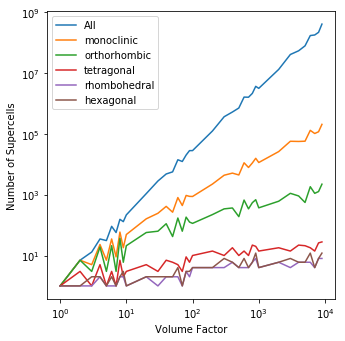

In [9]:
plt.plot(np.log10(xs), np.log10(all_HNFs),label="All")
plt.plot(np.log10(xs), np.log10(mono_HNFs),label="monoclinic")
plt.plot(np.log10(xs), np.log10(orth_HNFs),label="orthorhombic")
plt.plot(np.log10(xs), np.log10(tet_HNFs),label="tetragonal")
plt.plot(np.log10(xs), np.log10(rhom_HNFs),label="rhombohedral")
plt.plot(np.log10(xs), np.log10(hex_HNFs),label="hexagonal")

l = plt.gca().figure.subplotpars.left
r = plt.gca().figure.subplotpars.right
t = plt.gca().figure.subplotpars.top
b = plt.gca().figure.subplotpars.bottom
figw = float(4)/(r-l)
figh = float(4)/(t-b)
plt.gca().figure.set_size_inches(figw, figh)

xticks = np.arange(0, 5, 1)
xticklabels = [r"$10^{}$".format(tick) for tick in xticks]
plt.xticks(xticks, xticklabels)
yticks = np.arange(1, 11, 2)
yticklabels = [r"$10^{}$".format(tick) for tick in yticks]
plt.yticks(yticks, yticklabels)
#plt.plot(xs, cubic_HNFs,label="cubic")
#plt.title("Number of Supercells for a Volume")
plt.xlabel("Volume Factor")
plt.ylabel("Number of Supercells")
plt.legend()
#plt.axes().set_aspect('equal')
#plt.loglog()
plt.savefig("../plots/N_HNFs_per_vol_sparse.pdf")
plt.show()

In [2]:
max_fold = {"pos_1": 48, "pos_2": 16, "pos_4": 8,#24, 
            "pos_6": 8, "pos_5": 12, "pos_3": 4}
titles = {"pos_1": "cubic", "pos_2": "tetragonal", "pos_3": "monoclinic", 
          "pos_4": "hexagonal", "pos_5": "rhombohedral", "pos_6": "orthorhombic"}
data_dir = "data/"
opts = ["gamma", "shift"]

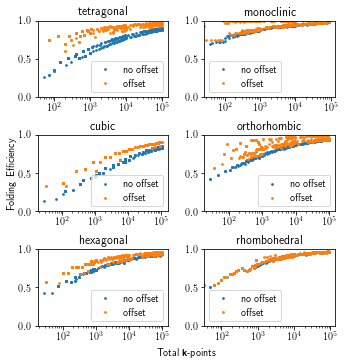

In [8]:
from os import listdir, path
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

n = 1
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(1,1,1)
for case, fold in max_fold.items():
    s_total = []
    s_reduced = []
    g_total = []
    g_reduced = []
    for op in opts:
        temp_dir = "{0}/{1}/{2}".format(data_dir, op, case)
        files = listdir(temp_dir)
        g_eff = []
        s_eff = []
        for f_in in files:
            if op == "gamma":
                with open(path.join(temp_dir, f_in), "r") as f:
                    for line in f:
                        if "total" in f_in:
                            g_total.append(int(line.strip()))
                        else:
                            g_reduced.append(int(line.strip()))
            elif op == "shift":
                with open(path.join(temp_dir, f_in), "r") as f:
                    for line in f:
                        if "total" in f_in:
                            s_total.append(int(line.strip()))
                        else:
                            s_reduced.append(int(line.strip()))
                        
    for i in range(len(g_total)):
        g_eff.append((float(g_total[i])/float(g_reduced[i]))/float(fold))
    for i in range(len(s_total)):
        s_eff.append((float(s_total[i])/float(s_reduced[i]))/float(fold))
    
    plt.subplot(3, 2, n)
    plt.scatter(g_total, g_eff, label="no offset", s=3)
    plt.scatter(s_total, s_eff, label="offset",s=3)
    
    l = plt.gca().figure.subplotpars.left
    r = plt.gca().figure.subplotpars.right
    t = plt.gca().figure.subplotpars.top
    b = plt.gca().figure.subplotpars.bottom
    figw = float(4)/(r-l)
    figh = float(4)/(t-b)
    plt.gca().figure.set_size_inches(figw, figh)

    plt.title(titles[case])
    plt.ylim(0,1)
    plt.xscale('log')
    #plt.rc('text', usetex=True)
    #plt.xlabel(r'Total $\textbf{k}$-points')
    #plt.ylabel("Folding Efficiency")
    plt.legend()
    n += 1
#plt.subplots_adjust(hspace=0.75)
fig.text(0.5, 0.03, r'Total $\textbf{k}$-points', ha='center', va='center')
fig.text(0.03, 0.5, "Folding Efficiency", ha="center", va="center", rotation="vertical")
fig.tight_layout(rect=[0,0,1,1])
fig.subplots_adjust(0.1,0.1,.9,.9)

#plt.savefig("../plots/shift_gamma_comp.pdf")
plt.show()

In [4]:
n_HNFs(3000)

40916590